In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

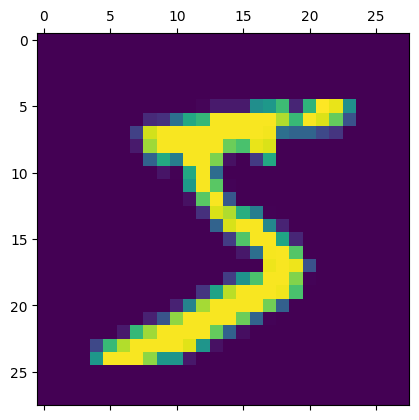

In [7]:
plt.matshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [13]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)



Epoch 1/5


1875/1875 [==============================] - 2s 860us/step - loss: 0.4679 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 2s 885us/step - loss: 0.3044 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 2s 872us/step - loss: 0.2835 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 2s 851us/step - loss: 0.2734 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 2s 852us/step - loss: 0.2668 - accuracy: 0.9255


In [16]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 748us/step - loss: 0.2674 - accuracy: 0.9240


[0.2673691511154175, 0.9240000247955322]

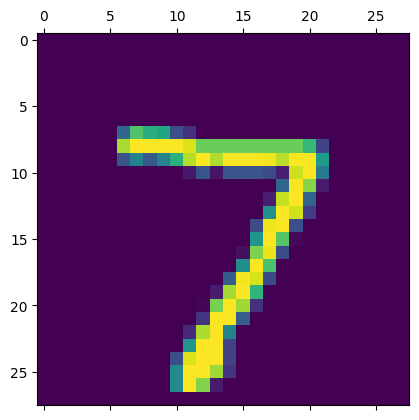

In [17]:
plt.matshow(x_test[0])

In [18]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 715us/step


array([3.07335835e-02, 3.18315870e-07, 5.56737892e-02, 9.47022676e-01,
       2.52634264e-03, 1.23389676e-01, 1.44356443e-06, 9.99828696e-01,
       1.13810331e-01, 6.16195083e-01], dtype=float32)

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   6,    8,  923,   17,   11,    3,   11,   12,   38,    3],
       [   3,    0,   20,  925,    1,   20,    2,   12,   20,    7],
       [   1,    1,    4,    1,  928,    0,   10,    4,    8,   25],
       [  11,    2,    4,   38,   11,  765,   12,    7,   35,    7],
       [  15,    3,   10,    1,    9,   11,  902,    2,    5,    0],
       [   1,    5,   23,    3,    8,    0,    0,  962,    2,   24],
       [   8,   10,    6,   24,    9,   25,    8,   15,  864,    5],
       [  11,    7,    1,    9,   42,    8,    0,   34,    6,  891]])>

Text(95.72222222222221, 0.5, 'Truth')

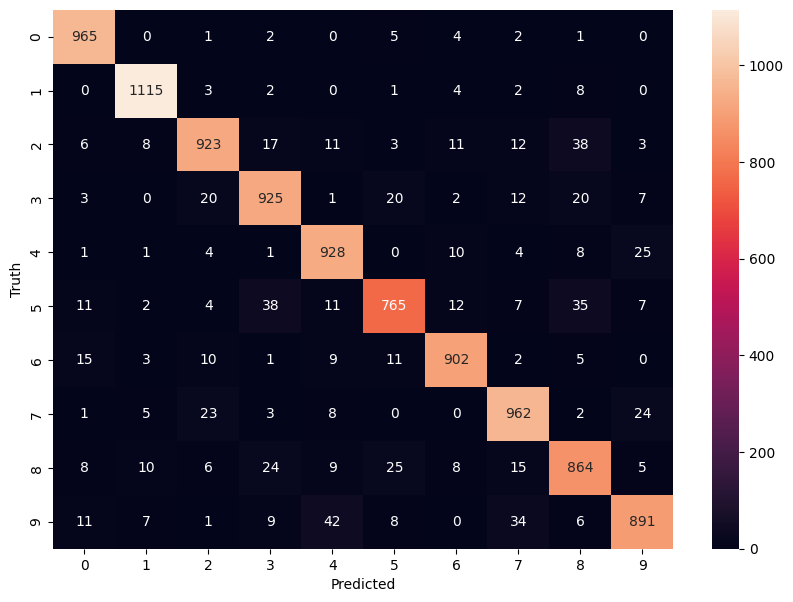

In [24]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2649 - accuracy: 0.9263
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1221 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0860 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0664 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0525 - accuracy: 0.9840


In [27]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 843us/step - loss: 0.0783 - accuracy: 0.9758


[0.07825864851474762, 0.9757999777793884]

In [29]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 774us/step


array([5.6733419e-03, 7.5991719e-04, 2.8609148e-01, 9.6029949e-01,
       3.5592788e-05, 2.8720817e-02, 5.1059722e-08, 9.9999136e-01,
       2.4868841e-01, 2.9468673e-01], dtype=float32)

In [30]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [31]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    0,    0,    1,    0,    2,    2,    3,    0],
       [   0, 1122,    4,    1,    0,    1,    2,    0,    5,    0],
       [   5,    2, 1002,    3,    1,    0,    2,    5,   12,    0],
       [   0,    1,    2,  989,    0,    3,    0,    7,    3,    5],
       [   1,    0,    1,    0,  964,    0,    6,    2,    1,    7],
       [   2,    0,    0,   11,    2,  857,    9,    3,    5,    3],
       [   6,    3,    3,    1,    5,    3,  933,    0,    4,    0],
       [   1,    5,    6,    2,    1,    0,    0, 1006,    3,    4],
       [   3,    0,    1,    3,    4,    1,    5,    2,  951,    4],
       [   4,    7,    0,    6,   10,    2,    0,   10,    8,  962]])>

Text(95.72222222222221, 0.5, 'Truth')

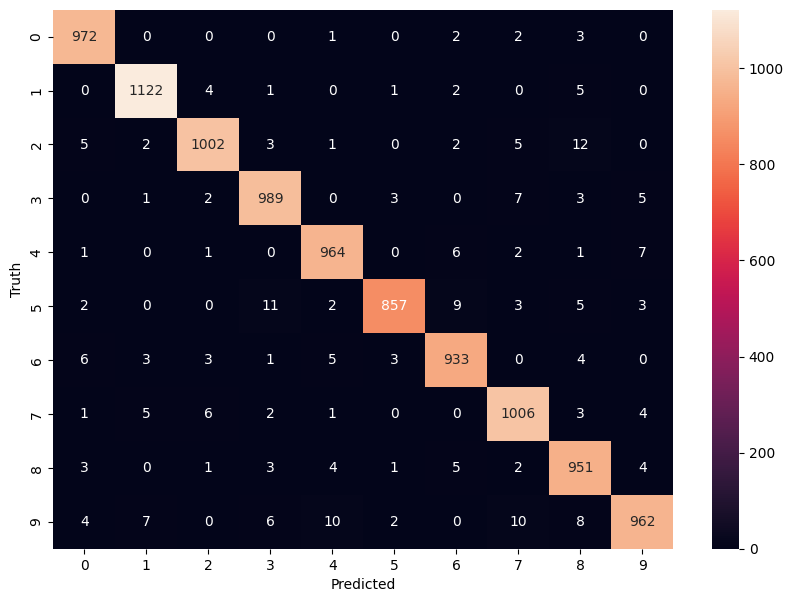

In [32]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2672 - accuracy: 0.9260
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1177 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0815 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0613 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0483 - accuracy: 0.9856


In [35]:
model.save('path_to_your_trained_model')

INFO:tensorflow:Assets written to: path_to_your_trained_model\assets


INFO:tensorflow:Assets written to: path_to_your_trained_model\assets
